In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
from keras.layers import Dense, Activation, Dropout, Reshape, Permute

In [3]:
import os
os.environ['PYTHONHASHSEED'] = '0'
import random as rn
import numpy as np
np.random.seed(1)
rn.seed(3)
import tensorflow
tensorflow.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
#from keras.layers.core import Dense, from keras.layers import Dense, Activation, Dropout, Reshape, Permute
#from keras.layers.recurrent import SimpleRNN


In [4]:
from keras.layers import SimpleRNN
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from math import sqrt
import datetime as dt
plt.style.use('ggplot')
import DatastreamDSWS as DSWS
import pyodbc

In [5]:
#pip install pyodbc

In [6]:
Data_R1=pd.read_csv("refinitiv_out_old.csv")
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])
Data_R1["Date"]=Data_R1["Date"].dt.date
Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])


Data_R2=pd.read_csv("refinitiv_out1.csv")
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])
Data_R2["Date"]=Data_R2["Date"].dt.date
Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])

Data_P1=pd.read_csv("platts_1.csv")

Data_P1["Date"]=Data_P1["assessDate"]

Data_P1.drop("assessDate",axis=1,inplace=True)

Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])
Data_P1["Date"]=Data_P1["Date"].dt.date


Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])

Data_P2=pd.read_csv("platts.csv")

Data_P2["Date"]=Data_P2["assessDate"]

Data_P2.drop("assessDate",axis=1,inplace=True)

Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])
Data_P2["Date"]=Data_P2["Date"].dt.date
Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])

Data_P2["Date"].dtype

Data_P3=pd.read_csv("platts_new.csv")

Data_P3["Date"]=Data_P3["assessDate"]

Data_P3.drop("assessDate",axis=1,inplace=True)


Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])
Data_P3["Date"]=Data_P3["Date"].dt.date
Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])

Data_A=pd.read_csv("argus_data.csv")
Data_A["Date"]=pd.to_datetime(Data_A["Date"])
Data_A["Date"]=Data_A["Date"].dt.date
Data_A["Date"]=pd.to_datetime(Data_A["Date"])

Data_A["Date"]

Data_A2=pd.read_csv("Argus_New_Data.csv")
Data_A2.rename(columns={"PUBLICATION_DATE":"Date"},inplace=True)

Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])
Data_A2["Date"]=Data_A2["Date"].dt.date
Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])

Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)
Data_x=pd.concat([Data_2,Data_1,Data_3],axis=0)
Data_x=Data_x.iloc[:,1:]
Data_x.reset_index(inplace=True)
Data_x=Data_x.drop_duplicates()


ffa= Data_x.loc[:,~Data_x.columns.duplicated()]


Data_P2= Data_P2.set_index('Date',)
Data_R1= Data_R1.set_index('Date') 
Data_P1= Data_P1.set_index('Date')
Data_P3= Data_P3.set_index('Date')
Data_R2= Data_R2.set_index('Date')
Data_A= Data_A.set_index('Date')
Data_A2= Data_A2.set_index('Date')
ffa= ffa.set_index('Date')

Data=pd.concat([Data_P2,Data_P1,Data_P3,Data_R1,Data_R2,Data_A,Data_A2,ffa],axis=1)

Data.reset_index(inplace=True)



In [7]:
Data

Date  AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  \
0    2011-12-30      NaN      NaN      NaN      NaN      NaN      NaN   
1    2012-01-02      NaN      NaN      NaN      NaN      NaN      NaN   
2    2012-01-03      NaN      NaN      NaN      NaN      NaN      NaN   
3    2012-01-04      NaN      NaN      NaN      NaN      NaN      NaN   
4    2012-01-05      NaN      NaN      NaN      NaN      NaN      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
4016 2024-02-29      NaN      NaN      NaN      NaN      NaN      NaN   
4017 2024-03-01      NaN      NaN      NaN      NaN      NaN      NaN   
4018 2024-03-29      NaN      NaN      NaN      NaN      NaN      NaN   
4019 2024-06-28      NaN      NaN      NaN      NaN      NaN      NaN   
4020 2024-12-31      NaN      NaN      NaN      NaN      NaN      NaN   

      AAXJJ03  AAXJL03  AAXRQ03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
0         NaN      NaN      NaN  ...       NaN       NaN       NaN   
1         NaN      NaN      NaN  ...       NaN       NaN       NaN   
2         NaN      NaN      NaN  ...       NaN       NaN       NaN   
3         NaN      NaN      NaN  ...       NaN       NaN       NaN   
4         NaN      NaN      NaN  ...       NaN       NaN       NaN   
...       ...      ...      ...  ...       ...       ...       ...   
4016      NaN      NaN      NaN  ...   16443.0   20464.0   23514.0   
4017      NaN      NaN      NaN  ...   17050.0   21121.0   24174.0   
4018      NaN      NaN      NaN  ...       NaN       NaN       NaN   
4019      NaN      NaN      NaN  ...       NaN       NaN       NaN   
4020      NaN      NaN      NaN  ...       NaN       NaN       NaN   

      5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
4016     21489.0     20350.0     19336.0     18814.0     18379.0     18300.0   
4017     22143.0     20643.0     19539.0     19021.0     18483.0     18350.0   
4018         NaN         NaN         NaN         NaN         NaN         NaN   
4019         NaN         NaN         NaN         NaN         NaN         NaN   
4020         NaN         NaN         NaN         NaN         NaN         NaN   

      5TC_C+7CAL  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4016     18250.0  
4017     18357.0  
4018         NaN  
4019         NaN  
4020         NaN  

[4021 rows x 10493 columns]

In [8]:
Data.shape

(4021, 10493)

In [9]:
Data_1 = (Data.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

In [10]:
Data_1

Date  AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  \
0    2015-01-01      NaN   52.876      NaN  110.643      NaN  23215.0   
1    2015-01-02      NaN      NaN   110.25      NaN     54.1      NaN   
2    2015-01-03      NaN      NaN      NaN      NaN      NaN      NaN   
3    2015-01-04      NaN      NaN      NaN      NaN      NaN      NaN   
4    2015-01-05      NaN      NaN   110.50      NaN     54.5      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
3264 2023-12-09      NaN      NaN      NaN      NaN      NaN      NaN   
3265 2023-12-10      NaN      NaN      NaN      NaN      NaN      NaN   
3266 2023-12-11     3.27      NaN   275.00      NaN     92.8      NaN   
3267 2023-12-12     3.32      NaN   277.00      NaN     91.5      NaN   
3268 2023-12-13     3.37      NaN   277.00      NaN     86.4      NaN   

      AAXJJ03  AAXJL03  AAXRQ03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
0      360.18   363.74    325.6  ...       NaN       NaN       NaN   
1         NaN      NaN      NaN  ...   10565.0   13007.0   14148.0   
2         NaN      NaN      NaN  ...       NaN       NaN       NaN   
3         NaN      NaN      NaN  ...       NaN       NaN       NaN   
4         NaN      NaN      NaN  ...   10228.0   12737.0   13858.0   
...       ...      ...      ...  ...       ...       ...       ...   
3264      NaN      NaN      NaN  ...       NaN       NaN       NaN   
3265      NaN      NaN      NaN  ...       NaN       NaN       NaN   
3266      NaN      NaN      NaN  ...   19625.0   11779.0   15629.0   
3267      NaN      NaN      NaN  ...   19986.0   12136.0   15971.0   
3268      NaN      NaN      NaN  ...   19714.0   11943.0   15779.0   

      5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1        13522.0     14510.0     14897.0     14929.0     15370.0     15781.0   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4        13441.0     14420.0     14867.0     14899.0     15330.0     15801.0   
...          ...         ...         ...         ...         ...         ...   
3264         NaN         NaN         NaN         NaN         NaN         NaN   
3265         NaN         NaN         NaN         NaN         NaN         NaN   
3266     16821.0     16200.0     16436.0     16443.0     16386.0     16279.0   
3267     17534.0     16554.0     16657.0     16629.0     16543.0     16421.0   
3268     17030.0     16271.0     16604.0     16604.0     16507.0     16386.0   

      5TC_C+7CAL  
0            NaN  
1        15952.0  
2            NaN  
3            NaN  
4        16042.0  
...          ...  
3264         NaN  
3265         NaN  
3266     16279.0  
3267     16400.0  
3268     16371.0  

[3269 rows x 10493 columns]

In [11]:
Data_1.set_index("Date",inplace=True)

In [12]:
Data_1=Data_1.fillna(method="ffill")

In [13]:
Data_2= Data_1.loc[:,~Data_1.columns.duplicated()]

In [14]:
Data_1=Data_1.fillna(method="ffill")

In [15]:
Data_2.shape

(3269, 9753)

In [16]:
Data_2

AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  AAXJJ03  \
Date                                                                        
2015-01-01      NaN   52.876      NaN  110.643      NaN  23215.0   360.18   
2015-01-02      NaN   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-03      NaN   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-04      NaN   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-05      NaN   52.876   110.50  110.643     54.5  23215.0   360.18   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-09     3.26   94.363   275.00  271.842     95.1  53975.0   540.69   
2023-12-10     3.26   94.363   275.00  271.842     95.1  53975.0   540.69   
2023-12-11     3.27   94.363   275.00  271.842     92.8  53975.0   540.69   
2023-12-12     3.32   94.363   277.00  271.842     91.5  53975.0   540.69   
2023-12-13     3.37   94.363   277.00  271.842     86.4  53975.0   540.69   

            AAXJL03  AAXRQ03  AAXWC03  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
Date                                   ...                                 
2015-01-01   363.74    325.6      NaN  ...       NaN       NaN       NaN   
2015-01-02   363.74    325.6      NaN  ...   10565.0   13007.0   14148.0   
2015-01-03   363.74    325.6      NaN  ...   10565.0   13007.0   14148.0   
2015-01-04   363.74    325.6      NaN  ...   10565.0   13007.0   14148.0   
2015-01-05   363.74    325.6      NaN  ...   10228.0   12737.0   13858.0   
...             ...      ...      ...  ...       ...       ...       ...   
2023-12-09   590.52    416.3    353.0  ...   19489.0   11643.0   15550.0   
2023-12-10   590.52    416.3    353.0  ...   19489.0   11643.0   15550.0   
2023-12-11   590.52    416.3    353.0  ...   19625.0   11779.0   15629.0   
2023-12-12   590.52    416.3    353.0  ...   19986.0   12136.0   15971.0   
2023-12-13   590.52    416.3    353.0  ...   19714.0   11943.0   15779.0   

            5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
Date                                                                     
2015-01-01         NaN         NaN         NaN         NaN         NaN   
2015-01-02     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-03     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-04     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-05     13441.0     14420.0     14867.0     14899.0     15330.0   
...                ...         ...         ...         ...         ...   
2023-12-09     16750.0     16171.0     16446.0     16450.0     16393.0   
2023-12-10     16750.0     16171.0     16446.0     16450.0     16393.0   
2023-12-11     16821.0     16200.0     16436.0     16443.0     16386.0   
2023-12-12     17534.0     16554.0     16657.0     16629.0     16543.0   
2023-12-13     17030.0     16271.0     16604.0     16604.0     16507.0   

            5TC_C+6CAL  5TC_C+7CAL  
Date                                
2015-01-01         NaN         NaN  
2015-01-02     15781.0     15952.0  
2015-01-03     15781.0     15952.0  
2015-01-04     15781.0     15952.0  
2015-01-05     15801.0     16042.0  
...                ...         ...  
2023-12-09     16307.0     16307.0  
2023-12-10     16307.0     16307.0  
2023-12-11     16279.0     16279.0  
2023-12-12     16421.0     16400.0  
2023-12-13     16386.0     16371.0  

[3269 rows x 9753 columns]

In [17]:
Data_2=Data_2.dropna(thresh=len(Data_2)-30, axis=1)

In [18]:
Data_2=Data_2.fillna(method="ffill")

In [19]:
Data_2.isnull().sum()

AAVUW03       0
AAWWR00       1
AAWWR03       0
AAXEX00       1
AAXJI03       0
             ..
5TC_C+3CAL    1
5TC_C+4CAL    1
5TC_C+5CAL    1
5TC_C+6CAL    1
5TC_C+7CAL    1
Length: 2575, dtype: int64

In [20]:
Tar=pd.read_excel("Copy of BCI - C5TC.xlsx")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2015-01-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Target

Value
Date               
2015-01-01      NaN
2015-01-02   4884.0
2015-01-03   4884.0
2015-01-04   4884.0
2015-01-05   4829.0
...             ...
2023-12-09  35320.0
2023-12-10  35320.0
2023-12-11  36475.0
2023-12-12  38082.0
2023-12-13  35711.0

[3269 rows x 1 columns]

In [21]:
# Target["shift_15"]=Target["Value"].shift(-15)

In [22]:
# Data_Fin=pd.concat([Target[['shift_15','Value']],Data_2],axis=1)

In [23]:
Data_Fin=pd.concat([Target['Value'],Data_2],axis=1)

In [24]:
Data_Fin

Value  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  AAXJJ03  \
Date                                                                        
2015-01-01      NaN   52.876      NaN  110.643      NaN  23215.0   360.18   
2015-01-02   4884.0   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-03   4884.0   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-04   4884.0   52.876   110.25  110.643     54.1  23215.0   360.18   
2015-01-05   4829.0   52.876   110.50  110.643     54.5  23215.0   360.18   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-09  35320.0   94.363   275.00  271.842     95.1  53975.0   540.69   
2023-12-10  35320.0   94.363   275.00  271.842     95.1  53975.0   540.69   
2023-12-11  36475.0   94.363   275.00  271.842     92.8  53975.0   540.69   
2023-12-12  38082.0   94.363   277.00  271.842     91.5  53975.0   540.69   
2023-12-13  35711.0   94.363   277.00  271.842     86.4  53975.0   540.69   

            AAXJL03  AAXRQ03  AISID04  ...  5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  \
Date                                   ...                                 
2015-01-01   363.74    325.6      NaN  ...       NaN       NaN       NaN   
2015-01-02   363.74    325.6    234.0  ...   10565.0   13007.0   14148.0   
2015-01-03   363.74    325.6    234.0  ...   10565.0   13007.0   14148.0   
2015-01-04   363.74    325.6    234.0  ...   10565.0   13007.0   14148.0   
2015-01-05   363.74    325.6    234.0  ...   10228.0   12737.0   13858.0   
...             ...      ...      ...  ...       ...       ...       ...   
2023-12-09   590.52    416.3    190.0  ...   19489.0   11643.0   15550.0   
2023-12-10   590.52    416.3    190.0  ...   19489.0   11643.0   15550.0   
2023-12-11   590.52    416.3    190.0  ...   19625.0   11779.0   15629.0   
2023-12-12   590.52    416.3    190.0  ...   19986.0   12136.0   15971.0   
2023-12-13   590.52    416.3    190.0  ...   19714.0   11943.0   15779.0   

            5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
Date                                                                     
2015-01-01         NaN         NaN         NaN         NaN         NaN   
2015-01-02     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-03     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-04     13522.0     14510.0     14897.0     14929.0     15370.0   
2015-01-05     13441.0     14420.0     14867.0     14899.0     15330.0   
...                ...         ...         ...         ...         ...   
2023-12-09     16750.0     16171.0     16446.0     16450.0     16393.0   
2023-12-10     16750.0     16171.0     16446.0     16450.0     16393.0   
2023-12-11     16821.0     16200.0     16436.0     16443.0     16386.0   
2023-12-12     17534.0     16554.0     16657.0     16629.0     16543.0   
2023-12-13     17030.0     16271.0     16604.0     16604.0     16507.0   

            5TC_C+6CAL  5TC_C+7CAL  
Date                                
2015-01-01         NaN         NaN  
2015-01-02     15781.0     15952.0  
2015-01-03     15781.0     15952.0  
2015-01-04     15781.0     15952.0  
2015-01-05     15801.0     16042.0  
...                ...         ...  
2023-12-09     16307.0     16307.0  
2023-12-10     16307.0     16307.0  
2023-12-11     16279.0     16279.0  
2023-12-12     16421.0     16400.0  
2023-12-13     16386.0     16371.0  

[3269 rows x 2576 columns]

In [25]:
Data_Fin=Data_Fin.fillna(method="ffill")

In [26]:
# Data_Fin.to_csv("Data_Fin.csv")

In [27]:
Data_Fin=Data_Fin.iloc[1:,:]

In [28]:
cor={}
for i in range(len(Data_Fin.columns)):   
    cor[Data_Fin.columns[i]]=Data_Fin["Value"].corr(Data_Fin.iloc[:,i])

Imp_f= {k:v for k,v in cor.items() if abs(v)>.50}
len(Imp_f)

371

In [29]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [30]:
Data_F = Data_Fin[keys].dropna()

In [31]:
Data_F.iloc[1:,:].isnull().sum()

Value         0
AAXJI03       0
AAXJJ03       0
AAXJL03       0
CIBCR00       0
             ..
5TC_C+1Q      0
5TC_C+3Q      0
5TC_C+4Q      0
5TC_C+1CAL    0
5TC_C+2CAL    0
Length: 371, dtype: int64

In [32]:
series=Data_F.iloc[1:,:]
train_data = series.iloc[:int(len(series)*0.75),1:].dropna()
val_data = series.iloc[int(len(series)*0.75):int(len(series)*0.9),1:].dropna()
test_data = series.iloc[int(len(series)*0.9):int(len(series)*1),1:].dropna()

In [33]:
n_past = 15
n_days_for_prediction=90
train_data = series.iloc[:int(len(series)*0.75),1:].dropna()
val_data = series.iloc[int(len(series)*0.75):int(len(series)*0.9),1:].dropna()
test_data = series.iloc[int(len(series)*0.9):int(len(series)*1),1:].dropna()
y_train_data = series.iloc[:int(len(series)*0.75),0].dropna()
y_val_data = series.iloc[int(len(series)*0.75):int(len(series)*0.9),0].dropna()
y_test_data = series.iloc[int(len(series)*0.9):int(len(series)*1),0].dropna()
        
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(pd.to_datetime(test_data.index))[-n_past], periods=n_days_for_prediction).tolist()
        
print(y_train_data.shape,val_data.shape,test_data.shape)

(2429,) (486, 370) (324, 370)


In [34]:
y_train_data.head()

Date
2015-01-31    6707.0
2015-02-01    6707.0
2015-02-02    6604.0
2015-02-03    6563.0
2015-02-04    6589.0
Name: Value, dtype: float64

In [35]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
y_train = sc.fit_transform(pd.DataFrame(y_train_data))
y_val = sc.transform(pd.DataFrame(y_val_data))
y_test = sc.transform(pd.DataFrame(y_test_data))
print(train.shape,val.shape,test.shape)
        
timesteps = 30
hl = [50,45]
lr = 1e-3
batch_size = 64
num_epochs = 15

(2429, 370) (486, 370) (324, 370)


In [36]:
train[30:60]

array([[0.06725471, 0.27989135, 0.1677359 , ..., 0.1727531 , 0.26028422,
        0.39489179],
       [0.06725471, 0.27989135, 0.1677359 , ..., 0.16735971, 0.25627738,
        0.38932209],
       [0.06725471, 0.27989135, 0.1677359 , ..., 0.16859484, 0.25424725,
        0.38971992],
       ...,
       [0.06725471, 0.27989135, 0.1677359 , ..., 0.15776689, 0.24222673,
        0.38717377],
       [0.06725471, 0.27989135, 0.1677359 , ..., 0.1468566 , 0.23041992,
        0.38049013],
       [0.06725471, 0.27989135, 0.1677359 , ..., 0.21499444, 0.22657335,
        0.37921706]])

In [37]:
train[60].shape

(370,)

In [38]:
train_data

AAXJI03  AAXJJ03  AAXJL03  CIBCR00  CIBCR03  CIFSC00  CIFSC03  \
Date                                                                        
2015-01-31  23215.0   360.18   363.74     6.35    6.417    -0.80   -0.800   
2015-02-01  25037.5   388.85   394.77     6.35    6.008    -0.80   -0.711   
2015-02-02  25037.5   388.85   394.77     6.25    6.008    -0.80   -0.711   
2015-02-03  25037.5   388.85   394.77     6.35    6.008    -0.80   -0.711   
2015-02-04  25037.5   388.85   394.77     6.30    6.008    -0.80   -0.711   
...             ...      ...      ...      ...      ...      ...      ...   
2021-09-20  60780.0   652.53   834.18    22.00   21.870    -1.65   -1.665   
2021-09-21  60780.0   652.53   834.18    22.75   21.870    -1.65   -1.665   
2021-09-22  60780.0   652.53   834.18    23.15   21.870    -1.65   -1.665   
2021-09-23  60780.0   652.53   834.18    24.40   21.870    -1.65   -1.665   
2021-09-24  60780.0   652.53   834.18    25.75   21.870    -1.65   -1.665   

            CIGAJ00  CIGAJ03  CIHIT03  ...  5TC_C+1MON  5TC_C+2MON  \
Date                                   ...                           
2015-01-31     4.65    5.152   11.202  ...      8258.0      8968.0   
2015-02-01     4.65    4.944   10.788  ...      8258.0      8968.0   
2015-02-02     4.55    4.944   10.788  ...      8238.0      8754.0   
2015-02-03     4.55    4.944   10.788  ...      8509.0      9168.0   
2015-02-04     4.50    4.944   10.788  ...      8644.0      9218.0   
...             ...      ...      ...  ...         ...         ...   
2021-09-20    21.70   21.582   23.455  ...     42839.0     38114.0   
2021-09-21    23.30   21.582   23.455  ...     46911.0     40214.0   
2021-09-22    25.85   21.582   23.455  ...     47336.0     40446.0   
2021-09-23    26.10   21.582   23.455  ...     49050.0     42214.0   
2021-09-24    24.35   21.582   23.455  ...     50625.0     43411.0   

            5TC_C+3MON  5TC_C+4MON  5TC_CCURQ  5TC_C+1Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                          
2015-01-31      9286.0      9692.0     7775.0    9315.0   15213.0    9440.0   
2015-02-01      9286.0      9692.0     7775.0    9315.0   15213.0    9440.0   
2015-02-02      9292.0      9690.0     7760.0    9245.0   15133.0    9430.0   
2015-02-03      9640.0     10032.0     8017.0    9613.0   15344.0    9665.0   
2015-02-04      9710.0     10182.0     8044.0    9703.0   15364.0    9620.0   
...                ...         ...        ...       ...       ...       ...   
2021-09-20     30300.0     24321.0    40445.0   37084.0   23700.0   28211.0   
2021-09-21     31621.0     25143.0    41321.0   39582.0   24032.0   28139.0   
2021-09-22     31807.0     25161.0    41443.0   39863.0   23686.0   27857.0   
2021-09-23     32824.0     26225.0    41757.0   41363.0   24229.0   28050.0   
2021-09-24     34221.0     26757.0    41778.0   42752.0   24450.0   28307.0   

            5TC_C+1CAL  5TC_C+2CAL  
Date                                
2015-01-31     12502.0     13965.0  
2015-02-01     12502.0     13965.0  
2015-02-02     12492.0     13924.0  
2015-02-03     12659.0     14071.0  
2015-02-04     12673.0     14020.0  
...                ...         ...  
2021-09-20     24838.0     18875.0  
2021-09-21     25130.0     18982.0  
2021-09-22     24834.0     18932.0  
2021-09-23     25331.0     19193.0  
2021-09-24     25568.0     19329.0  

[2429 rows x 370 columns]

In [39]:
X_train = []
Y_train = []
X_val = []
Y_val = []

# Loop for training data
for i in range(timesteps,train.shape[0]):
    X_train.append(train[i-timesteps:i])
    Y_train.append(y_train[i])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [40]:
X_train.shape

(2399, 30, 370)

In [41]:
train.shape

(2429, 370)

In [42]:
y_train[0]

array([0.07909813])

In [43]:
train

array([[0.0341328 , 0.22411553, 0.10007554, ..., 0.18823336, 0.28256224,
        0.40690643],
       [0.06303271, 0.27248494, 0.13506139, ..., 0.18823336, 0.28256224,
        0.40690643],
       [0.06303271, 0.27248494, 0.13506139, ..., 0.18782165, 0.28202799,
        0.40364418],
       ...,
       [0.62981169, 0.71734179, 0.63048944, ..., 0.94647783, 0.94139331,
        0.80211649],
       [0.62981169, 0.71734179, 0.63048944, ..., 0.95442381, 0.96794529,
        0.82288351],
       [0.62981169, 0.71734179, 0.63048944, ..., 0.96500473, 0.9806069 ,
        0.83370465]])

In [44]:
X_train = []
y_train = []

n_future = 30  # Number of days we want top predict into the future
n_past = 30   # Number of past days we want to use to predict the future

for i in range(n_past, len(train_data) - n_future +1):
    X_train.append(train[i - n_past:i, 1:train.shape[1]])
    y_train.append(train[i + n_future - 1:i + n_future, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))

X_train shape == (2370, 30, 369).
y_train shape == (2370, 1).


In [45]:
X_train[1].shape

(30, 369)

# 

In [46]:
X_val = []
y_val = []

n_future = 60   # Number of days we want top predict into the future
n_past = 90     # Number of past days we want to use to predict the future

for i in range(n_past, len(val_data) - n_future +1):
    X_val.append(val[i - n_past:i, 0:val.shape[1] - 1])
    y_val.append(val[i + n_future - 1:i + n_future, 0])

X_val, y_val= np.array(X_val), np.array(y_val)

print('X_train shape == {}.'.format(X_val.shape))
print('y_train shape == {}.'.format(y_val.shape))

X_train shape == (337, 90, 369).
y_train shape == (337, 1).


In [47]:
train.shape

(2429, 370)

In [ ]:
from keras.layers import LSTM

In [48]:
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
#             X_train = []
#             Y_train = []
#             X_val = []
#             Y_val = []
        
            # Loop for training data
#             for i in range(timesteps,train.shape[0]):
#                 X_train.append(train[i-timesteps:i])
#                 Y_train.append(y_train[i])
#             X_train,Y_train = np.array(X_train),np.array(Y_train)
            X_train = []
            Y_train = []

            n_future = 30   # Number of days we want top predict into the future
            n_past = 30    # Number of past days we want to use to predict the future

            for i in range(n_past, len(train) - n_future +1):
                X_train.append(train[i - n_past:i, 1:train.shape[1]])
                Y_train.append(train[i + n_future - 1:i + n_future, 0])

            X_train, Y_train = np.array(X_train), np.array(Y_train)


            # Loop for val data
#             for i in range(timesteps,val.shape[0]):
#                 X_val.append(val[i-timesteps:i])
#                 Y_val.append(y_val[i])
#             X_val,Y_val = np.array(X_val),np.array(Y_val)
            X_val = []
            Y_val = []

            n_future = 30   # Number of days we want top predict into the future
            n_past = 30    # Number of past days we want to use to predict the future

            for i in range(n_past, len(val) - n_future +1):
                X_val.append(val[i - n_past:i, 1:val.shape[1]])
                Y_val.append(val[i + n_future - 1:i + n_future, 0])

            X_val, Y_val= np.array(X_val), np.array(Y_val)

        
            # Adding Layers to the model
            model = Sequential()
            model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                                activation = 'relu'))
            for i in range(len(hl)-1):        
                model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
            model.add(SimpleRNN(hl[-1],activation = 'relu'))
            model.add(Dense(1))
            model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
            #print(model.summary())
            earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
            callbacks_list = [earlystop]
            # Training the data
            history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                                shuffle = False, callbacks=callbacks_list)
            model.reset_states()
            return model, history.history['loss'], history.history['val_loss']

In [49]:
# timesteps = 30
# hl = [50,45]
# lr = 1e-3
# batch_size = 32
# num_epochs = 15
# def fit_model(train,val,timesteps,hl,lr,batch,epochs):
#             X_train = []
#             Y_train = []
#             X_val = []
#             Y_val = []
        
#             # Loop for training data
#             for i in range(timesteps,train.shape[0]):
#                 X_train.append(train[i-timesteps:i])
#                 Y_train.append(y_train[i])
#             X_train,Y_train = np.array(X_train),np.array(Y_train)
        
#             # Loop for val data
#             for i in range(timesteps,val.shape[0]):
#                 X_val.append(val[i-timesteps:i])
#                 Y_val.append(y_val[i])
#             X_val,Y_val = np.array(X_val),np.array(Y_val)
        
#             # Adding Layers to the model
#             model = Sequential()
#             model.add(RNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
#                                 activation = 'relu'))
#             for i in range(len(hl)-1):        
#                 model.add(RNN(hl[i],activation = 'relu',return_sequences = True))
#             model.add(RNN(hl[-1],activation = 'relu'))
#             model.add(Dense(1))
#             model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
#             #print(model.summary())
#             earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
#             callbacks_list = [earlystop]
#             # Training the data
#             history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
#                                 shuffle = False, callbacks=callbacks_list)
#             model.reset_states()
#             return model, history.history['loss'], history.history['val_loss']

In [50]:
model,train_error,val_error = fit_model(train,val,30,hl,lr,batch_size,24)

Epoch 1/24
38/38 [==============================] - 9s 170ms/step - loss: 0.0343 - val_loss: 0.0370
Epoch 2/24
38/38 [==============================] - 6s 154ms/step - loss: 0.0109 - val_loss: 0.0672
Epoch 3/24
38/38 [==============================] - 6s 154ms/step - loss: 0.0180 - val_loss: 0.0406
Epoch 4/24
38/38 [==============================] - 6s 149ms/step - loss: 0.0136 - val_loss: 0.1186
Epoch 5/24
38/38 [==============================] - 6s 148ms/step - loss: 0.0093 - val_loss: 0.0913
Epoch 6/24
38/38 [==============================] - 6s 150ms/step - loss: 0.0246 - val_loss: 0.1047
Epoch 6: early stopping


In [60]:
def evaluate_model(model,test,timesteps):
            X_test = []
            Y_test = []
        
            # Loop for testing data
#             for i in range(timesteps,test.shape[0]):
#                 X_test.append(test[i-timesteps:i])
#                 Y_test.append(y_test[i])
#             X_test,Y_test = np.array(X_test),np.array(Y_test)
            #print(X_test.shape,Y_test.shape)
         
            n_future = 30   # Number of days we want top predict into the future
            n_past = 30    # Number of past days we want to use to predict the future

            for i in range(n_past, len(test) - n_future +1):
                X_test.append(test[i - n_past:i, 1:test.shape[1]])
                Y_test.append(test[i + n_future - 1:i + n_future, 0])

            X_test,Y_test=np.array(X_test), np.array(Y_test)
        
            # Prediction Time !!!!
            Y_hat = model.predict(X_test)
            mse = mean_squared_error(Y_test,Y_hat)
            rmse = sqrt(mse)
            r = r2_score(Y_test,Y_hat)
        
            bdp =1- np.round(np.min(np.abs(Y_hat-Y_test)/ Y_test),2)
            ldp =1- np.round(np.max(np.abs(Y_hat-Y_test)/ Y_test),2)
        
        
            mape = mean_absolute_percentage_error(Y_test,Y_hat)
            return mse, rmse, r, Y_test, Y_hat, mape, bdp*100, np.clip(ldp,0.7,1)*100

In [61]:
 X_test = []
Y_test = []

# Loop for testing data
#             for i in range(timesteps,test.shape[0]):
#                 X_test.append(test[i-timesteps:i])
#                 Y_test.append(y_test[i])
#             X_test,Y_test = np.array(X_test),np.array(Y_test)
#print(X_test.shape,Y_test.shape)

n_future = 30   # Number of days we want top predict into the future
n_past = 30    # Number of past days we want to use to predict the future

for i in range(n_past, len(test) - n_future +1):
    X_test.append(test[i - n_past:i, 1:test.shape[1]])
    Y_val.append(test[i + n_future - 1:i + n_future, 0])

X_test,Y_test=np.array(X_test), np.array(Y_test)

In [62]:
X_test.shape

(265, 30, 369)

In [63]:
Y_test.shape

(0,)

In [64]:
mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,test,timesteps)

9/9 [==============================] - 0s 22ms/step


In [75]:
predicted

array([[0.5266351 ],
       [0.5385596 ],
       [0.5499233 ],
       [0.5562472 ],
       [0.55665463],
       [0.55953383],
       [0.573117  ],
       [0.58388186],
       [0.588956  ],
       [0.6001246 ],
       [0.6006631 ],
       [0.60095376],
       [0.6034677 ],
       [0.60541373],
       [0.61152524],
       [0.61495745],
       [0.6161611 ],
       [0.6119661 ],
       [0.6150182 ],
       [0.614456  ],
       [0.6188698 ],
       [0.6170858 ],
       [0.6246714 ],
       [0.6137501 ],
       [0.6114483 ],
       [0.611243  ],
       [0.61345124],
       [0.6100188 ],
       [0.6071492 ],
       [0.61051714],
       [0.60590726],
       [0.60621583],
       [0.6057564 ],
       [0.60963637],
       [0.60623544],
       [0.61234117],
       [0.61152697],
       [0.6165697 ],
       [0.61382407],
       [0.6167614 ],
       [0.6199223 ],
       [0.6247063 ],
       [0.6281734 ],
       [0.6309722 ],
       [0.62945   ],
       [0.6311369 ],
       [0.63059264],
       [0.631

In [ ]:
 X_future = X_test[-1]  # Use last timesteps data as initial input for future prediction
    
# Loop for future prediction
future_predictions = []
for i in range(30):
    future_prediction = model.predict(X_future)  # Reshape for prediction
    future_predictions.append(future_prediction)
    X_future.append(np.append(X_test[:,1:]))

future_predictions = np.array(future_predictions)

In [65]:
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))
print('MAPE Score = {}'.format(mape))
print('BDP = {}'.format(bdp))
print('LDP = {}'.format(ldp))

MSE = 0.008237857796384291
RMSE = 0.09076264538004769
R-Squared Score = -5.07214604409807
MAPE Score = 0.15916594166986897
BDP = 100.0
LDP = 70.0


In [80]:
X_test.shape

(294, 30, 370)

In [82]:
predicted.shape

(265, 1)

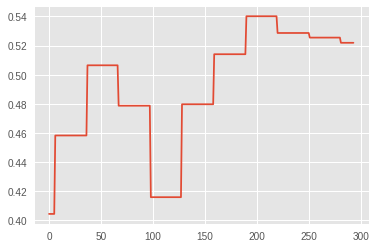

In [85]:
plt.plot(test[30:,0])

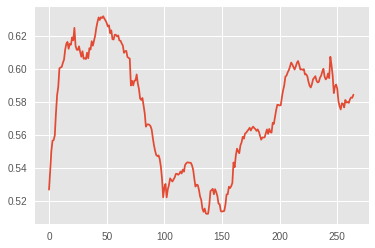

In [86]:
plt.plot(predicted)

In [66]:
#list(series)[0:126]

In [67]:
true = true.reshape(-1, 1)
predicted = predicted.reshape(-1, 1)
cols = list(series)[0:series.shape[1]]

In [68]:
df_for_training = series[cols].astype(float)
true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)

In [69]:
actualvalue = sc.inverse_transform(true_copies)[:,0]
predictedvalue = sc.inverse_transform(predicted_copies)[:,0]

In [70]:


actualvalue = actualvalue.tolist()
predictedvalue = predictedvalue.tolist()
actualVSpredicted = pd.DataFrame(
            {'Actual': actualvalue,
             'Predicted': predictedvalue
            })

In [71]:
resultant_dfalt = Data_F.reset_index(level=0)
li = resultant_dfalt['Date'].tail(len(test_data)-timesteps).tolist()
actualVSpredicted['Dates'] = pd.DataFrame({'col':li})

In [72]:
actualVSpredicted

Actual     Predicted      Dates
0    29340.765391  33424.062500 2023-02-23
1    29340.765391  34135.929688 2023-02-24
2    29340.765391  34814.320312 2023-02-25
3    29340.765391  35191.843750 2023-02-26
4    29340.765391  35216.167969 2023-02-27
..            ...           ...        ...
260  33141.557780  36562.050781 2023-11-10
261  33141.557780  36688.882812 2023-11-11
262  33141.557780  36759.253906 2023-11-12
263  33141.557780  36746.656250 2023-11-13
264  33141.557780  36859.187500 2023-11-14

[265 rows x 3 columns]

In [73]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(actualVSpredicted['Actual'],color="green",label="Actual")
plt.plot(actualVSpredicted['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(actualVSpredicted['Actual'].shape[0]):
    Mape.append((np.abs((actualVSpredicted['Actual'].iloc[i] - actualVSpredicted['Predicted'].iloc[i]) / actualVSpredicted['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

MAPE: 0.14872169455515571


In [74]:
X_test=[]
Y_test=[]
for i in range(timesteps,test.shape[0]):
                X_test.append(test[i-timesteps:i])
                Y_test.append(y_test[i])
X_test,Y_test = np.array(X_test),np.array(Y_test)

In [ ]:
X_test[-1].shape

In [ ]:
model.predict(X_test)

In [ ]:
test[-1]

In [ ]:

forecast = []

# Initial input for forecasting
last_sequence = test[-1] # Take the last sequence from validation data

for i in range(10):
    # Reshape the last sequence to match the model's input shape
    
    # Predict the next value
    mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,X_test[-1],30)
    
    # Append the prediction to the forecast list
    forecast.append(predicted)
    
    # Update the last sequence to include the predicted value
    last_sequence = np.append(last_sequence, [predicted], axis=1)

print("Forecast for the next 10 days:", forecast)

In [ ]:
predicted = model.predict(X_test[-1])

In [ ]:
test[-1].shape

In [ ]:
X_test[-1].shape

In [ ]:

np.array(test[-1])

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(actualVSpredicted['Actual'],color="green",label="Actual")
plt.plot(actualVSpredicted['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(actualVSpredicted['Actual'].shape[0]):
    Mape.append((np.abs((actualVSpredicted['Actual'].iloc[i] - actualVSpredicted['Predicted'].iloc[i]) / actualVSpredicted['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
pred_updated=[]
actual=actualVSpredicted[actualVSpredicted['Actual']!=0].Actual.values
pred=actualVSpredicted[actualVSpredicted['Actual']!=0].Predicted.values
        
difference= np.mean(actual-pred)
        
print(difference)
        
actualVSpredicted['Predicted']= actualVSpredicted['Predicted']+ difference
        
last_pred= actualVSpredicted[actualVSpredicted['Actual']!=0].Predicted.values[-1]
first_forecast= actualVSpredicted[actualVSpredicted['Actual']==0].Predicted.values[0]
        
        
first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
difference= first_forecast_updated- first_forecast
other_forecast_updated = actualVSpredicted[actualVSpredicted['Actual']==0].Predicted.values[1:] +difference
pred_updated.extend([first_forecast_updated])
pred_updated.extend(other_forecast_updated)
        
        
actualVSpredicted.Predicted[actualVSpredicted['Actual']==0]= pred_updated

In [ ]:
n_past = 10
n_days_for_prediction=90
        
train_data = series[:int(len(series)*0.9)]
val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
train_data = series[:int(len(series)*1)]
train_dates = pd.to_datetime(train_data.index)
predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
        
        
timesteps = 30
hl = [50,45]
lr = 1e-3
batch_size = 32
num_epochs = 100
        
X_train = []
Y_train = []

In [ ]:
for i in range(timesteps,val.shape[0]):
    X_train.append(val[i-timesteps:i])
    Y_train.append(val[i][0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

In [ ]:
n_days_for_prediction=90
prediction = model.predict(X_train[-n_days_for_prediction:])
cols = list(series)[0:126]
df_for_forecast = series[cols].astype(float)
prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
y_pred_future = sc.inverse_transform(prediction_copies)[:,0]        

In [ ]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'Value':y_pred_future})
df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])

In [ ]:
original = pd.DataFrame()
original['actual'] = Data_F['Value']
original = original.reset_index()

In [ ]:
#original

In [ ]:
original.rename(columns={'Date':'Dates'}, inplace = True)
original['Dates'] = original['Dates'].apply(pd.to_datetime)
df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
df_forecast_orignal = df_forecast_orignal.rename(columns={'Value':'predicted'})        

In [ ]:
tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['Value'][0:]
        }))
tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')

In [ ]:
tfd['week_day']=tfd['Dates'].dt.weekday
       
tfd=tfd[~tfd['week_day'].isin([5,6])]

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction",fontdict=font1)
plt.plot(tfd['Actual'],color="green",label="Actual")
plt.plot(tfd['Predicted'],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(tfd['Actual'].shape[0]):
    Mape.append((np.abs((tfd['Actual'].iloc[i] - tfd['Predicted'].iloc[i]) / tfd['Actual'].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
pred_updated=[]
actual=tfd[tfd['Actual']!=0].Actual.values
pred=tfd[tfd['Actual']!=0].Predicted.values
        
difference= np.mean(actual-pred)
        
print(difference)
        
tfd['Predicted']= tfd['Predicted']+ difference
        
last_pred= tfd[tfd['Actual']!=0].Predicted.values[-1]
first_forecast= tfd[tfd['Actual']==0].Predicted.values[0]
        
        
first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
difference= first_forecast_updated- first_forecast
other_forecast_updated = tfd[tfd['Actual']==0].Predicted.values[1:] +difference
pred_updated.extend([first_forecast_updated])
pred_updated.extend(other_forecast_updated)
        
        
tfd.Predicted[tfd['Actual']==0]= pred_updated

In [ ]:
n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []
        
        
        # Loop for val data
        for i in range(timesteps,val.shape[0]):
            X_train.append(val[i-timesteps:i])
            Y_train.append(val[i][0])
        X_train,Y_train = np.array(X_train),np.array(Y_train)
        
        
        n_days_for_prediction=90
        prediction = model.predict(X_train[-n_days_for_prediction:])
        cols = list(series)[0:35]
        df_for_forecast = df[cols].astype(float)
        prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
        y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
        
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
        df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])
        
        
        original = pd.DataFrame()
        original['actual'] = df['AL_cash_settlement']
        original = original.reset_index()
        original.rename(columns={'index':'Dates'}, inplace = True)
        original['Dates'] = original['Dates'].apply(pd.to_datetime)
        df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
        df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
        df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
        df_forecast_orignal = df_forecast_orignal.rename(columns={'AL_cash_settlement':'predicted'})
        
        
        
        tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['AL_cash_settlement'][0:]
        }))
        tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')
        
        
        
        tfd['week_day']=tfd['Dates'].dt.weekday
        
        
        tfd=tfd[~tfd['week_day'].isin([5,6])]
        
        
        tfd.to_csv(r'AL_raw_preds.csv')

In [ ]:
resultant_dfalt

In [ ]:

        

        
        
        #plot_error(train_error,val_error)
        
        
        # print('MSE = {}'.format(mse))
        # print('RMSE = {}'.format(rmse))
        # print('R-Squared Score = {}'.format(r2_value))
        # print('MAPE Score = {}'.format(mape))
        # print('BDP = {}'.format(bdp))
        # print('LDP = {}'.format(ldp))
        
        #plot_data(true,predicted)
        
        true = true.reshape(-1, 1)
        predicted = predicted.reshape(-1, 1)
        cols = list(series)[0:35]
        df_for_training = df[cols].astype(float)
        true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
        predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)
        
        
        
        actualvalue = sc.inverse_transform(true_copies)[:,0]
        predictedvalue = sc.inverse_transform(predicted_copies)[:,0]
        
        
        actualvalue = actualvalue.tolist()
        predictedvalue = predictedvalue.tolist()
        actualVSpredicted = pd.DataFrame(
            {'Actual': actualvalue,
             'Predicted': predictedvalue
            })#.to_excel('actualVSpredicted-2022-02-21.xlsx', index=False)
        resultant_dfalt = resultant_df.reset_index(level=0)
        li = resultant_dfalt['index'].tail(len(test_data)-timesteps).tolist()
        actualVSpredicted['Dates'] = pd.DataFrame({'col':li})
        
        
        
        n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []
        
        
        # Loop for val data
        for i in range(timesteps,val.shape[0]):
            X_train.append(val[i-timesteps:i])
            Y_train.append(val[i][0])
        X_train,Y_train = np.array(X_train),np.array(Y_train)
        
        
        n_days_for_prediction=90
        prediction = model.predict(X_train[-n_days_for_prediction:])
        cols = list(series)[0:35]
        df_for_forecast = df[cols].astype(float)
        prediction_copies = np.repeat(prediction, df_for_forecast.shape[1], axis=-1)
        y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
        
        forecast_dates = []
        for time_i in predict_period_dates:
            forecast_dates.append(time_i.date())
        df_forecast = pd.DataFrame({'Dates':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
        df_forecast['Dates']=pd.to_datetime(df_forecast['Dates'])
        
        
        original = pd.DataFrame()
        original['actual'] = df['AL_cash_settlement']
        original = original.reset_index()
        original.rename(columns={'index':'Dates'}, inplace = True)
        original['Dates'] = original['Dates'].apply(pd.to_datetime)
        df_forecast_orignal = df_forecast.merge(original, on='Dates', how='left')
        df_forecast_orignal['Dates'] = df_forecast_orignal['Dates'].drop_duplicates()
        df_forecast_orignal = df_forecast_orignal.drop(['Dates'], axis=1)
        df_forecast_orignal = df_forecast_orignal.rename(columns={'AL_cash_settlement':'predicted'})
        
        
        
        tfd = actualVSpredicted.append(pd.DataFrame({
        "Dates": df_forecast['Dates'][0:].values,
        "Actual": [0 for i in range(df_forecast.shape[0])],
        "Predicted": df_forecast['AL_cash_settlement'][0:]
        }))
        tfd['Dates'] = pd.to_datetime( tfd['Dates'], format='%Y-%m-%d')
        
        
        
        tfd['week_day']=tfd['Dates'].dt.weekday
        
        
        tfd=tfd[~tfd['week_day'].isin([5,6])]
        
        
        tfd.to_csv(r'AL_raw_preds.csv')
        

In [ ]:
Data_W=Data_2.resample("W-Sun").mean()

In [ ]:
Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [ ]:
Data_W.tail()

In [ ]:
#Data_new=pd.concat([Data_W,df_M],axis=1)
Data_new = Data_W

In [ ]:
Data_new.isnull().sum()

In [ ]:
Data_new

In [ ]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2014-02-24', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Target

Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

In [ ]:
Tag_f.drop(['shift_30'], axis=1,inplace=True)

In [ ]:
 earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
        callbacks_list = [earlystop]
        
        #Build and train the model
       
        
        def forecast(model,train,n_days_for_forecast):
            X_train = []
            Y_train = []
        
            # Loop for training data
            for i in range(timesteps,train.shape[0]):
                X_train.append(train[i-timesteps:i])
                Y_train.append(train[i][0])
            X_train,Y_train = np.array(X_train),np.array(Y_train)
        
            n_days_for_prediction=n_days_for_forecast
            prediction = model.predict(X_train[-n_days_for_prediction:])
            prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
            y_pred_future = sc.inverse_transform(prediction_copies)[:,0]
        
            forecast_dates = []
            for time_i in predict_period_dates:
                forecast_dates.append(time_i.date())
        
            df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
            df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
        #     df_forecast.to_excel('multivariate-3-RNN-forecast.xlsx')
            return df_forecast
        
        # Evaluating the model

        
        # Plotting the predictions
        def plot_data(Y_test,Y_hat):
            plt.figure(figsize = (20,7))
            plt.plot(Y_test,c = 'r')
            plt.plot(Y_hat,c = 'y')
            plt.xlabel('Day')
            plt.ylabel('Price')
            plt.title("Price Prediction using Multivatiate-RNN")
            plt.legend(['Actual','Predicted'],loc = 'lower right')
            plt.show()
        
        # Plotting the training errors
        def plot_error(train_loss,val_loss):
            plt.figure(figsize = (20,7))
            plt.plot(train_loss,c = 'r')
            plt.plot(val_loss,c = 'b')
            plt.ylabel('Loss')
            plt.xlabel('Epochs')
            plt.title('Loss Plot')
            plt.legend(['train','val'],loc = 'upper right')
            plt.show()
        
        
        
        series = df[["AL_cash_settlement","LAHCASH","LAH3MTH","LADCASH","LAD3MTH","LNA3MTH","LNACASH","LAH3MTC","LAH15MT","LAH27MT","LAD15MT","LAD3MTC","MAHCS04","BA:ALU","L:PMET","IN:NTA","G:ALU","AL_3months","EIA0007","CN:yal","CN:OSH","CN:WNG","BALTICF","CRUDOIL","OILWTIN","CRUDWTC","GSLUPRM","GSLUREG","SHGSIGL","LLCCS20","Natural_Gas","SHCNOPI","SHCNCPI"]]
        print(series.shape)
        print(series.tail())
        
        
        
        
        # Pulling the last ID count for inserting the latest index into db
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        outputID = pd.read_sql_query("select * from [PRICEPRED].[T_PP_MODEL_OUTPUT] where PMO_PARAM_ID='ALPRICEOUTPUT'",cnxn)
        cnxn.close()
        idcount = int(outputID.iloc[0].values[0])
        #idcount=10000
        
        tfd=tfd.reset_index(drop=True)
        
        
        
        
        def adjust_predictions(tfd):
                
            pred_updated=[]
            actual=tfd[tfd['Actual']!=0].Actual.values
            pred=tfd[tfd['Actual']!=0].Predicted.values
        
            difference= np.mean(actual-pred)
        
            print(difference)
        
            tfd['Predicted']= tfd['Predicted']+ difference
        
            last_pred= tfd[tfd['Actual']!=0].Predicted.values[-1]
            first_forecast= tfd[tfd['Actual']==0].Predicted.values[0]
        
        
            first_forecast_updated= np.clip(first_forecast, last_pred*0.97, last_pred*1.03)
            difference= first_forecast_updated- first_forecast
            other_forecast_updated = tfd[tfd['Actual']==0].Predicted.values[1:] +difference
            pred_updated.extend([first_forecast_updated])
            pred_updated.extend(other_forecast_updated)
        
        
            tfd.Predicted[tfd['Actual']==0]= pred_updated
        
        
            return tfd
        
        
        tfd= adjust_predictions(tfd)
        
        
        
        
        tfd=tfd[tfd['Dates']>= (dt.datetime.today()-dt.timedelta(days=180)).strftime("%Y-%m-%d") ] #### change it 
        
        
        tfd=tfd.reset_index(drop=True)
        
        
        def calculate_metrics(df):
           actual=df['Actual'].values
           pred=df['Predicted'].values
        
           #difference= np.mean(actual-pred)
        
           #print(difference)
           #pred= pred+difference
        
           mse = mean_squared_error(actual,pred)
           rmse = sqrt(mse)
           r = r2_score(actual,pred)
        
           bdp =1- np.round(np.min(np.abs(pred-actual)/ actual),2)
           ldp =1- np.round(np.max(np.abs(pred-actual)/ actual),2)
        
        
           mape = mean_absolute_percentage_error(actual,pred)
           return mse, rmse, r,  mape, bdp*100, ldp*100 #np.clip(ldp,0.7,1)*100
        
        
        
        mse, rmse, r2_value,  mape, bdp, ldp=calculate_metrics(tfd[tfd['Actual']!=0])
        
        finalDf = pd.DataFrame()
        
        finalDf['PMO_PRED_VALUE'] = tfd['Predicted']#.astype('int64')
        finalDf['PMO_OUTPUT_ID'] = np.arange(idcount+1,idcount+len(finalDf)+1).astype('int64')
        finalDf['PMO_ACT_VALUE'] = tfd['Actual']#.astype('int64')
        finalDf['PMO_PROG_RUNID'] = 1
        finalDf['PMO_STATUS'] = str('Y')
        finalDf['PMO_CRT_BY'] = str('A&I')
        finalDf['PMO_CRT_ON'] = (dt.datetime.today()).strftime('%Y-%m-%d')
        finalDf['Commodity'] = str('Aluminium')
        finalDf['MAPE'] = mape
        finalDf['r2score'] = np.clip(r2_value, 0.5, 1.0)
        finalDf['MSE'] = mse
        finalDf['RMSE'] = rmse
        finalDf['BDP'] = bdp
        finalDf['LDP'] =ldp
        finalDf['PMO_PRED_YEAR'] = tfd['Dates'].dt.isocalendar().year
        finalDf['PMO_PARAM_ID'] = str('ALPRICEOUTPUT')
        finalDf['PMO_PRED_MONTH'] = tfd['Dates'].dt.month
        finalDf['PMO_PRED_WEEKNO'] = tfd['Dates'].dt.isocalendar().week
        finalDf['PMO_PRED_STARTDT'] = pd. DatetimeIndex(tfd['Dates'])
        finalDf['PMO_PRED_ENDDT'] = pd. DatetimeIndex(tfd['Dates'])
        
        
        finalDf['PMO_PRED_STARTDT'] = pd.to_datetime(finalDf['PMO_PRED_STARTDT']).dt.strftime('%Y-%m-%d')
        finalDf['PMO_PRED_ENDDT'] = pd.to_datetime(finalDf['PMO_PRED_ENDDT']).dt.strftime('%Y-%m-%d')
        finalDf['PMO_CRT_ON'] = pd.to_datetime(finalDf['PMO_CRT_ON']).dt.strftime('%Y-%m-%d')
        #finalDf['PMO_UPD_ON'] = pd.to_datetime(finalDf['PMO_UPD_ON']).dt.strftime('%Y-%m-%d')
        
        finalDf['PMO_PRED_VALUE'] = finalDf['PMO_PRED_VALUE'].round(decimals = 2)
        finalDf['PMO_ACT_VALUE'] = finalDf['PMO_ACT_VALUE'].round(decimals = 2)
        finalDf['MAPE'] = finalDf['MAPE'].round(decimals = 2)
        finalDf['r2score'] = finalDf['r2score'].round(decimals = 2)
        finalDf['MSE'] = finalDf['MSE'].round(decimals = 2)
        finalDf['RMSE'] = finalDf['RMSE'].round(decimals = 2)
        finalDf['PMO_PRED_YEAR']= finalDf['PMO_PRED_YEAR'].astype(int)
        finalDf['PMO_PRED_WEEKNO']= finalDf['PMO_PRED_WEEKNO'].astype(int)
        
        finalDf.to_csv("AL_predfinal.csv",index=False)
        
        
        
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        cursor = cnxn.cursor()
        
        outputID = cursor.execute("DELETE FROM [PRICEPRED].[T_PP_MODEL_OUTPUT] WHERE PMO_PARAM_ID='ALPRICEOUTPUT'")
        cnxn.commit()
        cnxn.close()
        
        
        
        try:
            # server = '10.136.218.70'
            # database = 'PROCPRICEPRED'
            # username = 'PRICEPRED'
            # password = '590_Prafulla;'
            cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        
            print(cnxn)
            cursor = cnxn.cursor()
            for row in finalDf.itertuples():
                cursor.execute('''
                             INSERT INTO [PRICEPRED].[T_PP_MODEL_OUTPUT]([PMO_OUTPUT_ID],[PMO_PARAM_ID],[PMO_PRED_YEAR],[PMO_PRED_MONTH],[PMO_PRED_WEEKNO],[PMO_PRED_STARTDT],[PMO_PRED_ENDDT],[PMO_PRED_VALUE],[PMO_ACT_VALUE],[PMO_PROG_RUNID],[PMO_STATUS],[PMO_CRT_BY],[PMO_CRT_ON],[Commodity],[MAPE],[r2score],[MSE],[RMSE],[BDP],[LDP]) 
                             VALUES
                             (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                             ''',
                             row.PMO_OUTPUT_ID,row.PMO_PARAM_ID,row.PMO_PRED_YEAR,row.PMO_PRED_MONTH,row.PMO_PRED_WEEKNO,row.PMO_PRED_STARTDT,row.PMO_PRED_ENDDT,row.PMO_PRED_VALUE,row.PMO_ACT_VALUE,row.PMO_PROG_RUNID,row.PMO_STATUS,row.PMO_CRT_BY,row.PMO_CRT_ON,row.Commodity,row.MAPE,row.r2score,row.MSE,row.RMSE,row.BDP,row.LDP
                             )
            cnxn.commit()
            cursor.close()
            cnxn.close()
            print('Prediction insertion done!')
        except Exception as e:
            print(e)
            print('Failed to insert predictions')
            
            
        # server = '10.136.218.70'
        # database = 'PROCPRICEPRED'
        # username = 'PRICEPRED'
        # password = '590_Prafulla;'
        cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        outputID = pd.DataFrame()
        outputID['Date'] = pd.read_sql_query("select MAX(PPV_DATE) from [PRICEPRED].[T_PP_PARAM_VAL] where PPV_PARAM_ID='AL_cash_settlement_REF'",cnxn)
        cnxn.close()
        # idcount = int(outputID.iloc[0].values[0])
        max_dt = (outputID['Date']).to_string(index=False)
        print(max_dt)
        
        input_df2=resultant_df.reset_index()
        input_df2=input_df2[input_df2['index']>max_dt]
        
        if len(input_df2)>0:
            df = input_df2[['index','LAHCASH', 'LAH3MTH', 'LADCASH', 'LAD3MTH', 'LNA3MTH',
               'LNACASH', 'LAH3MTC', 'LAH15MT', 'LAH27MT', 'LAD15MT', 'LAD3MTC',
               'MAHCS04', 'BA:ALU', 'L:PMET', 'IN:NTA', 'G:ALU', 'EIA0007', 'CN:yal',
               'CN:OSH', 'CN:WNG', 'BALTICF', 'CRUDOIL', 'OILWTIN', 'CRUDWTC',
               'GSLUPRM', 'GSLUREG', 'SHGSIGL', 'LLCCS20', 'SHCNOPI', 'SHCNCPI',
               'AL_cash_settlement', 'AL_3months', 'Natural_Gas']]
            df=df.rename({'AL_cash_settlement':'_cash_settlement_REF', 'AL_3months':'_3months_REF','Natural_Gas':'Natural_Gas_REF'},axis=1)
            df_new = pd.DataFrame()
            variables = list(df.columns)
            variables.remove('index')
            for idx, val in df.iterrows():
                for var in variables:
                    df_new = df_new.append({
                        'Dates': val['index'],
                        'Variable': var,
                        'Value': val[var]
                    }, ignore_index = True)
        
        
            InputDf = pd.DataFrame()
        
            InputDf['PPV_YEAR'] = pd.to_datetime(df_new['Dates']).dt.year
            InputDf['PPV_MONTH_NO'] = pd.to_datetime(df_new['Dates']).dt.month
            InputDf['PPV_WEEK_NO'] = pd.to_datetime(df_new['Dates']).dt.isocalendar().week
            InputDf['PPV_DATE'] = pd.to_datetime(df_new['Dates'])
        
            InputDf['PPV_PARAM_ID'] ='AL'+ df_new['Variable']
            InputDf['PPV_PARAM_VAL'] = df_new['Value']
            InputDf['PPV_STATUS'] = str('Y')
            InputDf['PPV_CRT_BY'] = str('A&I')
            InputDf['PPV_CRT_ON'] = dt.date.today()
            InputDf['PPV_WEEK_NO']=InputDf['PPV_WEEK_NO'].astype(int)
            InputDf['PPV_DATE']=pd.to_datetime(InputDf['PPV_DATE']).dt.strftime("%Y-%m-%d")
            InputDf['PPV_CRT_ON']=pd.to_datetime(InputDf['PPV_CRT_ON']).dt.strftime("%Y-%m-%d")
        
            InputDf=InputDf[~InputDf['PPV_PARAM_VAL'].isna()]
        
            InputDf.to_csv("Input_df.csv")
        
        
        
            try:
                # server = '10.136.218.70'
                # database = 'PROCPRICEPRED'
                # username = 'PRICEPRED'
                # password = '590_Prafulla;'
                cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
        
                print(cnxn)
                cursor = cnxn.cursor()
                for row in InputDf.itertuples():
                    print(row)
                    cursor.execute('''
                                 INSERT INTO [PRICEPRED].[T_PP_PARAM_VAL]([PPV_YEAR],[PPV_MONTH_NO],[PPV_WEEK_NO],[PPV_DATE],[PPV_PARAM_ID],[PPV_PARAM_VAL],[PPV_STATUS],[PPV_CRT_BY],[PPV_CRT_ON]) 
                                 VALUES
                                 (?,?,?,?,?,?,?,?,?)
                                 ''',
                                 row.PPV_YEAR,row.PPV_MONTH_NO,row.PPV_WEEK_NO,row.PPV_DATE,row.PPV_PARAM_ID,row.PPV_PARAM_VAL,row.PPV_STATUS,row.PPV_CRT_BY,row.PPV_CRT_ON
                                 )
                cnxn.commit()
                cursor.close()
                cnxn.close()
                print("insertion complete")
            except Exception as e:
                print(e)
                cursor.close()
                cnxn.close()
                print("Input Insertion failed!")
                print('---')
        
        print("Model Run Complete")
        
    except Exception as e:
        print(e)
        print("Model run failed!")
        


In [ ]:
Tag_f.fillna(method="ffill",inplace=True)

In [ ]:
Tag_f=Tag_f.iloc[1:,:]

In [ ]:
Tag_f

In [ ]:
Tag_f["shift_4"]=Tag_f["Value"].shift(-4)

In [ ]:
Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [ ]:
cor={}
for i in range(len(Data_Fin.columns)):   
    cor[Data_Fin.columns[i]]=Data_Fin["Value"].corr(Data_Fin.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>.7}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
keys

In [ ]:
Data_new.fillna(method="ffill")

In [ ]:
Final=pd.concat([Data_new,Tag_f[['Value', 'shift_2',
 'Value_fshift_3',
 'Value_fshift_7',
 'Value_fshift_14',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_rollm_21',
 'Value_rollm_28',
 'Value_rollm_35',
 'Value_rollm_42',
 'Value_rollm_49',
 'Value_rollm_54',
 'Value_rollm_63',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'Value_ewm_21',
 'Value_ewm_28',
 'Value_ewm_35',
 'Value_ewm_42',
 'Value_ewm_49',
 'Value_ewm_54',
 'EMA_Diff_28_14_7',
 'EMA_Diff_35_21_14',
 'EMA_Diff_49_28_21',
 'EMA_Diff_70_35_21',
 'EMA_Diff_100_54_35',
 'EMA_Diff_100_54_42',
 'EMA_Diff_120_63_49',
 'EMA_Diff_120_63_42',
 'EMA_Diff_150_70_54',
 'EMA_Value_ewm_3-Value_ewm_70',
 'EMA_Value_ewm_3-Value_ewm_90',
 'EMA_Value_ewm_3-Value_ewm_100',
 'EMA_Value_ewm_3-Value_ewm_120',
 'EMA_Value_ewm_3-Value_ewm_150',
 'EMA_Value_ewm_3-Value_ewm_180',
 'EMA_Value_ewm_3-Value_ewm_210',
 'EMA_Value_ewm_14-Value_ewm_90',
 'EMA_Value_ewm_14-Value_ewm_100',
 'EMA_Value_ewm_14-Value_ewm_120',
 'EMA_Value_ewm_14-Value_ewm_150',
 'EMA_Value_ewm_14-Value_ewm_180',
 'EMA_Value_ewm_14-Value_ewm_210',
 'EMA_Value_ewm_28-Value_ewm_150',
 'EMA_Value_ewm_28-Value_ewm_180',
 'EMA_Value_ewm_28-Value_ewm_210',
 'EMA_Value_ewm_100-Value_ewm_7',
 'EMA_Value_ewm_100-Value_ewm_21',
 'EMA_Value_ewm_150-Value_ewm_7',
 'EMA_Value_ewm_150-Value_ewm_21',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',]]],axis=1)

In [ ]:
Final.isnull().sum()

In [ ]:
Data_f=Final.iloc[1:-4,:]

In [ ]:
Data_f.isnull().sum()

In [ ]:
Data_f.dropna(axis=1,inplace=True)

In [ ]:
Data_f.shape

In [ ]:
f_c=list(Data_f.columns)

In [ ]:
f_c.remove("shift_2")

In [ ]:
f_c[-10:]

In [ ]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [ ]:
Data_f.shape

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>.6}
len(Imp_f)

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
sorted_dict

In [ ]:
keys

In [ ]:
Data_F=Data_Fin[keys]

In [ ]:
Data_f.shape

In [ ]:
f_c=list(Data_f.columns)

f_c.remove("shift_2")

In [ ]:
len(f_c)

In [ ]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [ ]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [ ]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [ ]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [ ]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [ ]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [ ]:
Data_f.reset_index(inplace=True)

In [ ]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [ ]:
Data_f.head()

In [ ]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [ ]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [ ]:
Data_f.set_index("Date",inplace=True)

In [ ]:
Data_f=Data_f.iloc[8:,:]

In [ ]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [ ]:
Data_f.fillna(method="ffill",inplace=True)

In [ ]:
Data_f.isnull().sum()

In [ ]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_2"].corr(Data_f.iloc[:,i])

In [ ]:
Imp_f= {k:v for k,v in cor.items() if abs(v)>=.65}
len(Imp_f)

In [ ]:
#Tag_f["Value"].corr(Final['CapeOI010118'])

In [ ]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [ ]:
sorted_dict

In [ ]:
X_Final=Data_f[keys]

In [ ]:
X_Final.fillna(method="ffill",inplace=True)

In [ ]:
X_Final.shape

In [ ]:
X_Final.tail()

In [ ]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [ ]:
X_Final.shape

In [ ]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [ ]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [ ]:
X_Final.fillna(method="ffill",inplace=True)

In [ ]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

In [ ]:
X_Final.drop('shift_2',axis=1,inplace=True)

In [ ]:
Tag_f.head

In [ ]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [ ]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [ ]:
X_Final["UCOEXOT_ewm_6"].tail(10)

In [ ]:
X_Final.drop(['Value'], axis=1, inplace=True)

In [ ]:
X_Final['Value']

In [ ]:
exp_reg102 = setup(data =X_Final.iloc[:X_Final.shape[0]-50,:], target = 'shift_2', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.98) 

In [ ]:
X_Final.isnull().sum()

In [ ]:
postdf=get_config('X_transformed')

In [ ]:
postdf.columns

In [ ]:
postdf.columns

In [ ]:
compare_models()

In [ ]:
par=create_model("et")

In [ ]:
et = tune_model(par, optimize='MAPE')

In [ ]:
Mod1=finalize_model(par)

pred2 = predict_model(Mod1, data=X_Final.iloc[X_Final.shape[0]-50:,:])

In [ ]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_2"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_2"].diff(4)

Res["diff1_P"]=Res["prediction_label"].diff(4)

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_2_Weeks",fontdict=font1)
plt.plot(Res["shift_2"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_2",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_2"].shape[0]):
    Mape.append((np.abs((Res["shift_2"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_2"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
Res.tail()

In [ ]:
Tag_f.Value.values[-54:-4]

In [ ]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [ ]:
directional_acc(Res["prediction_label"],Res["shift_2"],Tag_f.Value.values[-54:-4])

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_25_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [ ]:
plt.plot(Res["shift_4"])

In [ ]:
Tag_f

In [ ]:
Res["Value"]=Tag_f["Value"].iloc[-50:]

In [ ]:
Tag_f["Value"].iloc[-54:]

In [ ]:
Res["Value"]=Tag_f["Value"].iloc[-54:]

In [ ]:
Res

In [ ]:
Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [ ]:
X_fin